In [1]:
import cv2
from tutils import tfilename
import numpy as np
from skimage.exposure import histogram
from sklearn.metrics import mutual_info_score
from PIL import Image
import torch
import torchvision
import torchvision.transforms.functional as F

# lm0: min 0.7, max 1.75
# im = cv2.imread("001.bmp", cv2.IMREAD_GRAYSCALE)
def test_mi(lm, im, br=1.5, ct=1.4):
    # lm = [165, 291]
    # lm = [100,308]
    # print()
    ps_half = 32
    patch = im[max(lm[0]-ps_half, 0):min(lm[0]+ps_half, 384), max(0, lm[1]-ps_half):min(lm[1]+ps_half, 384)]
    assert patch.shape[0] > 0 and patch.shape[1] > 0, f"Got patch.shape {patch.shape}"

    def get_fea(patch):
        fea = np.zeros((256,))
        hist, idx = histogram(patch, nbins=256)
        for hi, idi in zip(hist, idx):
            # print(hi, idi, i, j)
            fea[idi] = hi
        return fea
        
    # fea1 = get_fea(np.clip(patch-np.mean(patch).astype(int), -128, 127))
    fea1 = get_fea(patch)
    # cv2.imwrite("patch1.jpg", patch)

    # fn_aug = transforms.ColorJitter(brightness=0.9)
    patch_aug = Image.fromarray(patch)
    patch_aug = F.adjust_brightness(patch_aug, br)
    patch_aug = F.adjust_contrast(patch_aug, ct)
    # patch_aug = F.adjust_saturation(patch_aug, 5)
    # patch_aug = F.adjust_hue(patch_aug, -0.2)
    patch_aug = np.array(patch_aug)
    # print("??????")
    # cv2.imwrite("patch2.jpg", patch_aug)
    fea2 = get_fea(patch_aug)
    # fea2 = get_fea(np.clip(patch_aug-np.mean(patch_aug).astype(int), -128, 127))

    mi0 = mutual_info_score(fea1, fea1)
    mi = mutual_info_score(fea1, fea2)
    return mi0, mi
# print("lm ", lm, ",  entr ", entr[lm[0], lm[1]], "self_mi, aug_mi ", mi0, mi)

In [2]:
%matplotlib inline
from cProfile import label
# import seaborn as sns
import matplotlib.pylab as plt
plt.style.use("ggplot")
# lm = [165, 291]
# lm = [100,308]
lms = [[165, 291], [100,308], [20,20]]
im_path = tfilename('/home1/quanquan/datasets/Cephalometric/', "RawImage/TrainingData", "002.bmp")
im = cv2.imread(im_path, cv2.IMREAD_GRAYSCALE)
im = cv2.resize(im, (384, 384))
entr = np.load('/home1/quanquan/datasets/Cephalometric/entr1/train/2.npy')

def get_augmi_list(lm, im):
    augmi_list = []
    # print(lm, entr[lm[0], lm[1]])
    for s in range(19):
        s = s / 10
        selfmi, augmi = test_mi(lm=lm, im=im, br=.1+s, ct=.1+s)
        augmi_list.append(augmi)
    return augmi_list
        # print(entr[lm[0], lm[1]], s, selfmi, augmi)

for lm in lms:
    res  = get_augmi_list(lm, im)
    print(res)

# i = 0
# xx_list = []
# auglistlist = []
# for _ in range(20):
#     lm = [np.random.randint(384)  ,np.random.randint(384)]
#     print("[???] lm ", lm , "  entr ", entr[lm[0], lm[1]], end="   \r")
#     if entr[lm[0], lm[1]] >= 4:
#         augmi_list = get_augmi_list(lm, im)
#         xx = np.arange(10)*0.1+1.0
#         i = i + 1
#         xx_list.append(xx)
#         auglistlist.append(auglistlist)
#         print("[***] Got i=", i)
#     if i >5: break

# xx_list = np.concatenate(xx_list)
# print(xx_list.shape)
# auglistlist = np.concatenate(auglistlist)
# print(auglistlist.shape)
# # sns.plot(xx_list, np.array(auglistlist))
# plt.legend()

[0.07121715147494313, 0.21323290451678886, 0.5063724928019189, 0.8178568648963794, 1.0974093955002975, 1.490439902677089, 1.7660612921424692, 1.9127470509177056, 2.035587413390708, 3.516177505814883, 1.8782614800457018, 1.714539374711599, 1.5368646890245397, 1.3769120441869451, 1.234691232077243, 1.0801601086710524, 0.9637833266668023, 0.8860811916392852, 0.8068194588511354]
[0.02420972328190758, 0.2018027380498305, 0.41278609195684923, 0.6576976128556419, 1.0404271179642808, 1.3278474443711177, 1.4904991127962757, 1.6765846822887716, 1.8460650388122062, 3.338916990579897, 1.6246078815778633, 1.3725710555947566, 1.2968576520754427, 1.1487415408985948, 1.0065952132443674, 0.9412624032441614, 0.9127403060548326, 0.8426715320035026, 0.7384210666986828]
[0.09673047411238042, 0.19455786561576346, 0.4125073568574693, 0.6065138242593445, 0.6926981334820844, 0.8013766296759539, 0.8870893879190211, 1.0468487742179882, 1.2999285800136913, 3.0781526730211866, 1.2303730911902808, 0.890510520130708

/home1/quanquan/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home1/quanquan/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home1/quanquan/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

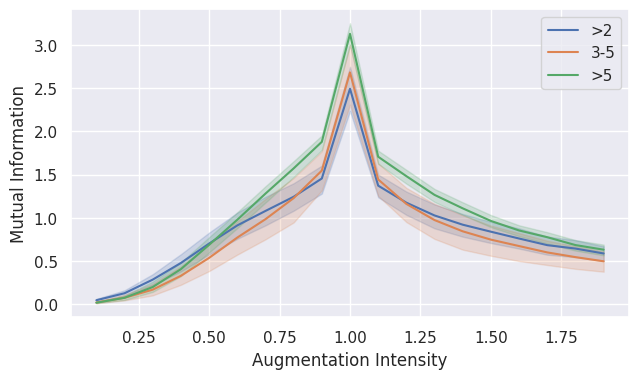

In [9]:
from einops import rearrange
import seaborn as sns


sns.set(rc={"figure.figsize":(4*1.8, 4)}) #width=8, height=4
i = 0
auglistlist = []
xxlist = []
while True:
    lm = [np.random.randint(384), np.random.randint(384)]
    if entr[lm[0], lm[1]] < 2:
        auglist = get_augmi_list(lm, im)
        auglistlist.append(auglist)
        xxlist.append(np.arange(19)/10+0.1)
        i = i + 1
        # print("Got i=", i)
        # plt.plot(np.arange(len(auglist)), np.array(auglist))
    if i >20: break
auglistlist = np.array(auglistlist)
xxlist = np.array(xxlist)
auglistlist1 = rearrange(auglistlist, "h w -> (h w)")
xxlist1 = rearrange(xxlist, "h w -> (h w)")
sns.lineplot(xxlist1, auglistlist1, label=">2")
# print(xxlist)


i = 0
auglistlist = []
xxlist = []
while True:
    lm = [np.random.randint(384)  ,np.random.randint(384)]
    if entr[lm[0], lm[1]] > 3 and  entr[lm[0], lm[1]] < 5:
        auglist = get_augmi_list(lm, im)
        auglistlist.append(auglist)
        xxlist.append(np.arange(19)/10+0.1)
        i = i + 1
        # print("Got i=", i)
        # plt.plot(np.arange(len(auglist)), np.array(auglist))
    if i >20: break
auglistlist = np.array(auglistlist)
xxlist = np.array(xxlist)
auglistlist2 = rearrange(auglistlist, "h w -> (h w)")
xxlist2 = rearrange(xxlist, "h w -> (h w)")
sns.lineplot(xxlist2, auglistlist2, label="3-5")


i = 0
auglistlist = []
xxlist = []
while True:
    lm = [np.random.randint(384)  ,np.random.randint(384)]
    if entr[lm[0], lm[1]] > 5 :
        auglist = get_augmi_list(lm, im)
        auglistlist.append(auglist)
        xxlist.append(np.arange(19)/10+0.1)
        i = i + 1
        # print("Got i=", i)
        # plt.plot(np.arange(len(auglist)), np.array(auglist))
    if i >20: break
auglistlist = np.array(auglistlist)
xxlist = np.array(xxlist)
auglistlist3 = rearrange(auglistlist, "h w -> (h w)")
xxlist3 = rearrange(xxlist, "h w -> (h w)")
sns.lineplot(xxlist3, auglistlist3, label=">5")
plt.xlabel("Augmentation Intensity")
plt.ylabel("Mutual Information")
plt.savefig("aug-mi.pdf")
# plt.legend()

/home1/quanquan/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home1/quanquan/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home1/quanquan/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

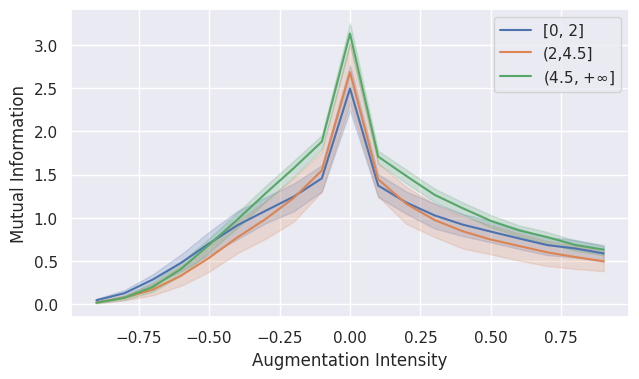

In [11]:

sns.lineplot(xxlist1-1, auglistlist1, label="[0, 2]")
sns.lineplot(xxlist2-1, auglistlist2, label="(2,4.5]")
sns.lineplot(xxlist3-1, auglistlist3, label=r"(4.5, $+\infty$]")
plt.xlabel("Augmentation Intensity")
plt.ylabel("Mutual Information")
plt.savefig("aug-mi.pdf")